This is a documentation of the DISTANA PK implementation

Ein Linear Layer (https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
mit tanh Aktivierung ohne Bias

Pytorch Default LSTM Layer ohne Bias (https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html)

und wieder ein Linear Layer mit tanh Aktivierung ohne Bias.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math

## The TanH Function

$\tanh (x) = \frac{\sinh x}{\cosh x} = \frac{\mathrm{e}^x - \mathrm{e}^{-x}}{\mathrm{e}^x + \mathrm{e}^{-x}}=\frac{\mathrm{e}^{2x}-1}{\mathrm{e}^{2x}+1} = 1-\frac{2}{\mathrm{e}^{2x}+1}$

$\tanh ' (x) = \frac{d}{dx}\tanh(x) = 1 - \tanh(x)^2 = 1 - [\tanh(x) * \tanh(x) ]$

In [54]:
def tanh(x):
    return 1.0 - 2.0/(math.exp(2.0*x) +1.0)

def d_tanh(x):
    z = tanh(x)
    return 1.0 - z*z

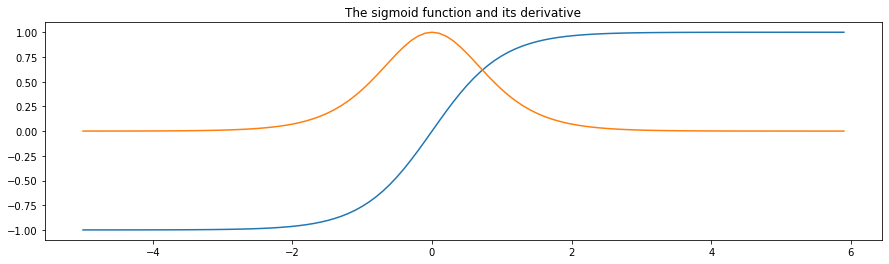

In [55]:
x1 = np.array([x_i for x_i in range(-50,60)])*0.1
y1 = [tanh(x) for x in x1]
x2 = np.array([x_i for x_i in range(-50,60)])*0.1
y2 = [d_tanh(x) for x in x2]

fig = plt.figure(figsize=(15,4))
plt.title("The sigmoid function and its derivative")
plt.plot(x1,y1)
plt.plot(x2,y2)

## The Sigmoid Function

$\sigma(x) = \frac{1}{1 + e^{-x}}$

$\sigma ' (x) = \frac{d}{dx} \sigma(x) = \sigma(x) (1-\sigma(x))$


In [56]:
def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

def d_sigmoid(x):
    z = sigmoid(x)
    return z * (1.0-z)

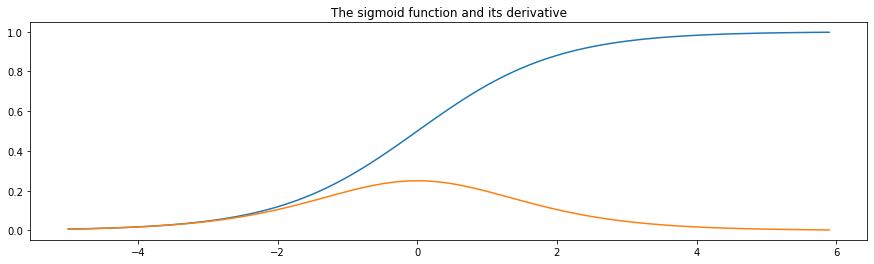

In [57]:
x1 = np.array([x_i for x_i in range(-50,60)])*0.1
y1 = [sigmoid(x) for x in x1]
x2 = np.array([x_i for x_i in range(-50,60)])*0.1
y2 = [d_sigmoid(x) for x in x2]

fig = plt.figure(figsize=(15,4))
plt.title("The sigmoid function and its derivative")
plt.plot(x1,y1)
plt.plot(x2,y2)

## Artificial Neural Network: Fully connected layer without bias

<font color='red'>Interpreting a 1 dimensional array as row vector.</font>

$\cdot$ matrix multiplication \
$\circ$ Hadamard product\
$\odot$ pointwise multiplication

#### Forward pass ( per sample)

$$ \tanh(\boldsymbol{x} \cdot \boldsymbol{W}) = \boldsymbol{\hat{y}} $$

$$\tanh \left( \begin{bmatrix}x_1& \dots & x_i\end{bmatrix} \cdot \begin{bmatrix} W_{1,1} & \dots & W_{1,o} \\ \vdots & \ddots  & \vdots \\ W_{i,1} & \dots &  W_{i,o} \end{bmatrix} \right)= \begin{bmatrix}\hat{y_1}& \dots & \hat{y_o}\end{bmatrix} \quad \boldsymbol{x} \in \mathbb{R}^i, \boldsymbol{W} \in \mathbb{R}^{i\times o}, \boldsymbol{\hat{y}} \in \mathbb{R}^o$$






#### Backward pass (per sample)

$$ \text{SquaredLoss}(\boldsymbol{\hat{y}}) = (\boldsymbol{y} - \boldsymbol{\hat{y}})^2$$

$$ \frac{\partial}{\partial \boldsymbol{W}} \text{SquaredLoss}(\boldsymbol{\hat{y}}) = \frac{1}{2} (\boldsymbol{y} - \boldsymbol{\hat{y}}) \circ \text{tanh'}(\boldsymbol{x} \cdot \boldsymbol{W}) \odot \begin{pmatrix}x_1^{(1)} & \dots & x_1^{(o)} \\ \vdots & \ddots  & \vdots \\ x_i^{(1)} & \dots & x_i^{(o)}\end{pmatrix}$$

$$ \frac{\partial}{\partial \boldsymbol{x}} \text{SquaredLoss}(\boldsymbol{\hat{y}}) = \frac{1}{2} (\boldsymbol{y} - \boldsymbol{\hat{y}}) \circ \text{tanh'}(\boldsymbol{x} \cdot \boldsymbol{W}) \circ \begin{pmatrix} \sum_{z=1}^{o} W_{1,z} & \dots & \sum_{z=1}^{o} W_{i,z} \end{pmatrix} $$



## Recurrent Neural Network: LSTM 

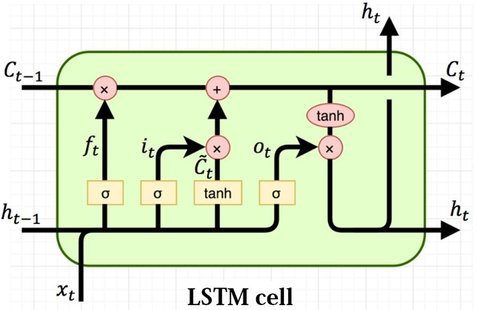

Structure of the LSTM cell and equations that describe the gates of an LSTM cell.

_Varsamopoulos, Savvas & Bertels, Koen & Almudever, Carmen. (2018). Designing neural network based decoders for surface codes._ 

**$\boldsymbol{i_t}$** is the output vector of **input gate** at time step t, using weight matrix $\boldsymbol{W^i}$ and $\boldsymbol{Q^i}$

**$\boldsymbol{f_t}$** is the output vector of **forget gate** at time step t, using weight matrix $\boldsymbol{W^f}$ and $\boldsymbol{Q^f}$

**$\boldsymbol{o_t}$** is the output vector of **output gate** at time step t, using weight matrix $\boldsymbol{W^o}$ and $\boldsymbol{Q^o}$

**$\boldsymbol{g_t}$** is a **helping vector** for calculating the cell state later at time step t, using weight matrix $\boldsymbol{W^g}$ and $\boldsymbol{Q^g}$

**$\boldsymbol{C_t}$** is the **cell state** at time step t, using old Cell state $\boldsymbol{C_{t-1}}$ 

**$\boldsymbol{h_t}$** is the output vector of the **LSTM** at time step t

For $n$ input neurons and $l$ LSTM cells you get:

$\boldsymbol{i_t}, \boldsymbol{f_t}, \boldsymbol{o_t}, \boldsymbol{g_t}, \boldsymbol{C_t}, \boldsymbol{h_t} \in \mathbb{R}^{l}$

$\boldsymbol{W^i}, \boldsymbol{W^f}, \boldsymbol{W^o}, \boldsymbol{W^g}, \in \mathbb{R}^{n \times l}$

$\boldsymbol{Q^i}, \boldsymbol{Q^f},\boldsymbol{Q^o}, \boldsymbol{Q^g} \in \mathbb{R}^{l \times l}$

#### Forward pass (per sample)

$$\begin{aligned} \boldsymbol{f_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \\ \boldsymbol{i_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \\ \boldsymbol{o_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \\ \boldsymbol{\tilde{C}_{t}} &=\tanh \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{c}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{c}}\right) \\ \boldsymbol{C_{t}} &=\boldsymbol{f_{t}} \circ \boldsymbol{C_{t-1}}+\boldsymbol{i_{t}} \circ \boldsymbol{\tilde{C}_{t}} \\ \boldsymbol{h_{t}} &=\tanh \left(\boldsymbol{C_{t}}\right) \circ \boldsymbol{o_{t}} \end{aligned}$$

#### Backward pass (per sample)

$$\frac{\partial}{\partial \boldsymbol{h_t}} SL (\hat{y}) =  -\frac{1}{2} (\boldsymbol{y} - \boldsymbol{\hat{y}}) \circ \text{tanh'}(\boldsymbol{h_t} \cdot \boldsymbol{W_{out}}) \circ \begin{pmatrix} \sum_{z=1}^{out} W_{1,z} & \dots & \sum_{z=1}^{out} W_{l,z} \end{pmatrix} + \frac{\partial}{\partial \boldsymbol{\tilde{h_{t+1}}}} $$

$$\frac{\partial}{\partial \boldsymbol{o_t}} = \frac{\partial}{\partial \boldsymbol{h_t}} \circ \text{tanh}(\boldsymbol{C_t})$$

$$\frac{\partial}{\partial \boldsymbol{C_t}} = \frac{\partial}{\partial \boldsymbol{h_t}} \circ \boldsymbol{o_t} \circ \text{tanh'}(\boldsymbol{C_t}) + \frac{\partial}{\partial \boldsymbol{C_{t+1}}}$$

$$\frac{\partial}{\partial \boldsymbol{f_t}} = \frac{\partial}{\partial \boldsymbol{C_t}}\circ \boldsymbol{C_{t-1}}$$

$$\frac{\partial}{\partial \boldsymbol{g_t}} = \frac{\partial}{\partial \boldsymbol{C_t}} \circ \boldsymbol{i_{t}}$$

$$\frac{\partial}{\partial \boldsymbol{i_t}}= \frac{\partial}{\partial \boldsymbol{C_t}} \circ \boldsymbol{g_{t}}$$

**g** - Cell state Weight matrices:

$$\frac{\partial}{\partial \boldsymbol{W^g}} = \frac{\partial}{\partial \boldsymbol{g_t}} \circ \text{tanh'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{g}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{g}}\right) \odot \begin{pmatrix}x_{t,1}^{(1)} & \dots & x_{t,1}^{(l)} \\ \vdots & \ddots  & \vdots \\ x_{t,n}^{(1)} & \dots & x_{t,n}^{(l)}\end{pmatrix}$$

$$\frac{\partial}{\partial \boldsymbol{Q^g}} = \frac{\partial}{\partial \boldsymbol{g_t}}  \circ \text{tanh'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{g}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{g}}\right) \odot \begin{pmatrix}h_{(t-1),1}^{(1)} & \dots & h_{(t-1),1}^{(l)} \\ \vdots & \ddots  & \vdots \\ h_{(t-1),l}^{(1)} & \dots & h_{(t-1),l}^{(l)}\end{pmatrix}$$


**i** - input gate weight matrices:


$$\frac{\partial}{\partial \boldsymbol{W^i}} = \frac{\partial}{\partial \boldsymbol{i_t}} \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \odot \begin{pmatrix}x_{t,1}^{(1)} & \dots & x_{t,1}^{(l)} \\ \vdots & \ddots  & \vdots \\ x_{t,n}^{(1)} & \dots & x_{t,n}^{(l)}\end{pmatrix}$$

$$\frac{\partial}{\partial \boldsymbol{Q^i}} = \frac{\partial}{\partial \boldsymbol{i_t}}  \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \odot \begin{pmatrix}h_{(t-1),1}^{(1)} & \dots & h_{(t-1),1}^{(l)} \\ \vdots & \ddots  & \vdots \\ h_{(t-1),l}^{(1)} & \dots & h_{(t-1),l}^{(l)}\end{pmatrix}$$



**o** - output gate weight matrices:

$$\frac{\partial}{\partial \boldsymbol{W^o}} = \frac{\partial}{\partial \boldsymbol{o_t}}  \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \odot \begin{pmatrix}x_{t,1}^{(1)} & \dots & x_{t,1}^{(l)} \\ \vdots & \ddots  & \vdots \\ x_{t,n}^{(1)} & \dots & x_{t,n}^{(l)}\end{pmatrix}$$

$$\frac{\partial}{\partial \boldsymbol{Q^o}} = \frac{\partial}{\partial \boldsymbol{o_t}} \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \odot \begin{pmatrix}h_{(t-1),1}^{(1)} & \dots & h_{(t-1),1}^{(l)} \\ \vdots & \ddots  & \vdots \\ h_{(t-1),l}^{(1)} & \dots & h_{(t-1),l}^{(l)}\end{pmatrix}$$

**f** - forget gate weight matrices:

$$\frac{\partial}{\partial \boldsymbol{W^f}} = \frac{\partial}{\partial \boldsymbol{f_t}} \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \odot \begin{pmatrix}x_{t,1}^{(1)} & \dots & x_{t,1}^{(l)} \\ \vdots & \ddots  & \vdots \\ x_{t,n}^{(1)} & \dots & x_{t,n}^{(l)}\end{pmatrix}$$

$$\frac{\partial}{\partial \boldsymbol{Q^f}} = \frac{\partial}{\partial \boldsymbol{f_t}} \circ \sigma\text{'} \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \odot \begin{pmatrix}h_{(t-1),1}^{(1)} & \dots & h_{(t-1),1}^{(l)} \\ \vdots & \ddots  & \vdots \\ h_{(t-1),l}^{(1)} & \dots & h_{(t-1),l}^{(l)}\end{pmatrix}$$

**x** Input vector:

$$\frac{\partial}{\partial \boldsymbol{x_t}} = \sigma\text{'}\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} W_{1,z}^{f} & \dots & \sum_{z=1}^{l} W_{n,z}^{f} \end{pmatrix}$$

$$ +\;  \sigma\text{'}\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} W_{1,z}^{i} & \dots & \sum_{z=1}^{l} W_{n,z}^{i} \end{pmatrix}$$

$$ +\;  \sigma\text{'}\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{g}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{g}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} W_{1,z}^{g} & \dots & \sum_{z=1}^{l} W_{n,z}^{g} \end{pmatrix}$$

$$ +\;  \text{tanh'}\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} W_{1,z}^{o} & \dots & \sum_{z=1}^{l} W_{n,z}^{o} \end{pmatrix}$$

**h** hidden vector:


$$\frac{\partial}{\partial \boldsymbol{\tilde{h_t}}} = \sigma\text{'}\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} Q_{1,z}^{f} & \dots & \sum_{z=1}^{l} Q_{n,z}^{f} \end{pmatrix}$$

$$ +\;  \sigma\text{'}\left(\boldsymbol{h_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} Q_{1,z}^{i} & \dots & \sum_{z=1}^{l} Q_{n,z}^{i} \end{pmatrix}$$

$$ +\;  \sigma\text{'}\left(\boldsymbol{h_{t}} \cdot \boldsymbol{W^{g}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{g}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} Q_{1,z}^{g} & \dots & \sum_{z=1}^{l} Q_{n,z}^{g} \end{pmatrix}$$

$$ +\;  \text{tanh'}\left(\boldsymbol{h_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \circ \begin{pmatrix} \sum_{z=1}^{l} Q_{1,z}^{o} & \dots & \sum_{z=1}^{l} Q_{n,z}^{o} \end{pmatrix}$$

## Alex Graves LSTM Equations



source: Supervised Sequence Labelling with Recurrent Neural Networks by Alex Graves (PhD Thesis) \
available under: https://www.cs.toronto.edu/~graves/phd.pdf

$w_{ij}$ is the weight of the connection from unit $i$ to unit $j$

$a_j^t$ is the network input to some unit j at time t

$b_j^t$ value of same unit after the activation function has been applied

$\iota$ for input gate

$\phi$ for forget gate

$\omega$ for output gate

subscript $c$ refers to one of the C memory cells

$s_c^t$ is the state of cell c at time t

$f$ is the activation function of the gates\
$g$ input activation function\
$h$ output activation function

$I$ number of inputs\
$K$ number of outputs\ 
$H$ number of cells in the hidden layer

Forward pass is calculated for a length $T$ by starting at $t=1$
recursevly applying the update equations while incrementing t

BPTT packward pass is calculated by starting at t=T and recursively calculating the unit derivatives while decrementing t. The final weight derivatives are found by summing over the derivatives at each timestep.

As with standard RNNs, all states and activations are set to zero at $t=0$, and all $\delta$ terms are zero at $t = T + 1$

### Original Equations with Peephole Connection

### Forward Pass

#### Input Gate
\begin{aligned} a_{\iota}^{t} &=\sum_{i=1}^{I} w_{i \iota} x_{i}^{t}+\sum_{h=1}^{H} w_{h \iota} b_{h}^{t-1}+\sum_{c=1}^{C} w_{c l} s_{c}^{t-1} \\ b_{\iota}^{t} &=f\left(a_{\iota}^{t}\right) \end{aligned}

#### Forget Gates

\begin{aligned} a_{\phi}^{t} &=\sum_{i=1}^{I} w_{i \phi} x_{i}^{t}+\sum_{h=1}^{H} w_{h \phi} b_{h}^{t-1}+\sum_{c=1}^{C} w_{c \phi} s_{c}^{t-1} \\ b_{\phi}^{t} &=f\left(a_{\phi}^{t}\right) \end{aligned}

#### Cells

\begin{aligned} a_{c}^{t} &=\sum_{i=1}^{I} w_{i c} x_{i}^{t}+\sum_{h=1}^{H} w_{h c} b_{h}^{t-1} \\ s_{c}^{t} &=b_{\phi}^{t} s_{c}^{t-1}+b_{\iota}^{t} g\left(a_{c}^{t}\right) \end{aligned}

#### Output Gates

\begin{aligned} a_{\omega}^{t} &=\sum_{i=1}^{I} w_{i \omega} x_{i}^{t}+\sum_{h=1}^{H} w_{h \omega} b_{h}^{t-1}+\sum_{c=1}^{C} w_{c \omega} s_{c}^{t} \\ b_{\omega}^{t} &=f\left(a_{\omega}^{t}\right) \end{aligned}

#### Cell Outputs

\begin{aligned}b_{c}^{t}=b_{\omega}^{t} h\left(s_{c}^{t}\right)\end{aligned}

### Backward Pass

\begin{aligned}\epsilon_{c}^{t} \stackrel{\text { def }}{=} \frac{\partial O}{\partial b_{c}^{t}} \quad \epsilon_{s}^{t} \stackrel{\text { def }}{=} \frac{\partial O}{\partial s_{c}^{t}}\end{aligned}

#### Cell Outputs

\begin{aligned}\epsilon_{c}^{t}=\sum_{k=1}^{K} w_{c k} \delta_{k}^{t}+\sum_{h=1}^{H} w_{c h} \delta_{h}^{t+1}\end{aligned}

#### Output Gates

\begin{aligned}\delta_{\omega}^{t}=f^{\prime}\left(a_{\omega}^{t}\right) \sum_{c=1}^{C} h\left(s_{c}^{t}\right) \epsilon_{c}^{t}\end{aligned}

#### States

\begin{aligned}\epsilon_{s}^{t}=b_{\omega}^{t} h^{\prime}\left(s_{c}^{t}\right) \epsilon_{c}^{t}+b_{\phi}^{t+1} \epsilon_{s}^{t+1}+w_{c \iota} \delta_{\iota}^{t+1}+w_{c \phi} \delta_{\phi}^{t+1}+w_{c \omega} \delta_{\omega}^{t}\end{aligned}

#### Cells

\begin{aligned}\delta_{c}^{t}=b_{\iota}^{t} g^{\prime}\left(a_{c}^{t}\right) \epsilon_{s}^{t}\end{aligned}

#### Forget Gates

\begin{aligned}\delta_{\phi}^{t}=f^{\prime}\left(a_{\phi}^{t}\right) \sum_{c=1}^{C} s_{c}^{t-1} \epsilon_{s}^{t}\end{aligned}

#### Input Gates

\begin{aligned}\delta_{\iota}^{t}=f^{\prime}\left(a_{\iota}^{t}\right) \sum_{c=1}^{C} g\left(a_{c}^{t}\right) \epsilon_{s}^{t}\end{aligned}

### Custom Equations (without Peephole Connection)

### Forward Pass

#### Input Gate
\begin{aligned} a_{\iota}^{t} &=\sum_{i=1}^{I} w_{i \iota} x_{i}^{t}+\sum_{h=1}^{H} w_{h \iota} b_{h}^{t-1} \\ b_{\iota}^{t} &=f\left(a_{\iota}^{t}\right) \end{aligned}

#### Forget Gates

\begin{aligned} a_{\phi}^{t} &=\sum_{i=1}^{I} w_{i \phi} x_{i}^{t}+\sum_{h=1}^{H} w_{h \phi} b_{h}^{t-1} \\ b_{\phi}^{t} &=f\left(a_{\phi}^{t}\right) \end{aligned}

#### Cells

\begin{aligned} a_{c}^{t} &=\sum_{i=1}^{I} w_{i c} x_{i}^{t}+\sum_{h=1}^{H} w_{h c} b_{h}^{t-1} \\ s_{c}^{t} &=b_{\phi}^{t} s_{c}^{t-1}+b_{\iota}^{t} g\left(a_{c}^{t}\right) \end{aligned}

#### Output Gates

\begin{aligned} a_{\omega}^{t} &=\sum_{i=1}^{I} w_{i \omega} x_{i}^{t}+\sum_{h=1}^{H} w_{h \omega} b_{h}^{t-1} \\ b_{\omega}^{t} &=f\left(a_{\omega}^{t}\right) \end{aligned}

#### Cell Outputs

\begin{aligned}b_{c}^{t}=b_{\omega}^{t} h\left(s_{c}^{t}\right)\end{aligned}

### Backward Pass

\begin{aligned}\epsilon_{c}^{t} \stackrel{\text { def }}{=} \frac{\partial O}{\partial b_{c}^{t}} \quad \epsilon_{s}^{t} \stackrel{\text { def }}{=} \frac{\partial O}{\partial s_{c}^{t}}\end{aligned}

#### Cell Outputs

\begin{aligned}\epsilon_{c}^{t}=\sum_{k=1}^{K} w_{c k} \delta_{k}^{t}+\sum_{h=1}^{H} w_{c h} \delta_{h}^{t+1}\end{aligned}

#### Output Gates

\begin{aligned}\delta_{\omega}^{t}=f^{\prime}\left(a_{\omega}^{t}\right) \sum_{c=1}^{C} h\left(s_{c}^{t}\right) \epsilon_{c}^{t}\end{aligned}

#### States

\begin{aligned}\epsilon_{s}^{t}=b_{\omega}^{t} h^{\prime}\left(s_{c}^{t}\right) \epsilon_{c}^{t}+b_{\phi}^{t+1} \epsilon_{s}^{t+1}+w_{c \iota} \delta_{\iota}^{t+1}+w_{c \phi} \delta_{\phi}^{t+1}+w_{c \omega} \delta_{\omega}^{t}\end{aligned}

#### Cells

\begin{aligned}\delta_{c}^{t}=b_{\iota}^{t} g^{\prime}\left(a_{c}^{t}\right) \epsilon_{s}^{t}\end{aligned}

#### Forget Gates

\begin{aligned}\delta_{\phi}^{t}=f^{\prime}\left(a_{\phi}^{t}\right) \sum_{c=1}^{C} s_{c}^{t-1} \epsilon_{s}^{t}\end{aligned}

#### Input Gates

\begin{aligned}\delta_{\iota}^{t}=f^{\prime}\left(a_{\iota}^{t}\right) \sum_{c=1}^{C} g\left(a_{c}^{t}\right) \epsilon_{s}^{t}\end{aligned}

In [3]:
import numpy as np
import torch as th

In [88]:
a = np.random.rand(10,3)
b = np.random.rand(10,3,4)

In [89]:
x = a @ b

In [90]:
x.shape

(10, 10, 4)

In [91]:
c = th.rand(1,2,3)
d = th.rand(1,2,3,4)

y = th.matmul(c,d)
y.size()

torch.Size([1, 2, 2, 4])

input_ = (10, 256, 9, 1)

one weight matrix for all PKs in all batches

10 batches\
256 pks (16x16)\
1 x 1 dyn_in\
8 x 1 lat_in\
16 LSTM cells

In [92]:
input_ = th.zeros(10,256,9,1)

# Flatten the last two input dims
input_flat = th.flatten(input_, start_dim=2)

input_flat.size()

torch.Size([10, 256, 9])

In [93]:
W_input = th.zeros(9,16) 

In [94]:
x_t = th.tanh(th.matmul(input_flat, W_input))

In [95]:
x_t.size()

torch.Size([10, 256, 16])

#### Forward pass (per sample)

$$\begin{aligned} \boldsymbol{f_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{f}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{f}}\right) \\ \boldsymbol{i_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{i}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{i}}\right) \\ \boldsymbol{o_{t}} &=\sigma\left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{o}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{o}}\right) \\ \boldsymbol{\tilde{C}_{t}} &=\tanh \left(\boldsymbol{x_{t}} \cdot \boldsymbol{W^{c}}+\boldsymbol{h_{t-1}} \cdot \boldsymbol{Q^{c}}\right) \\ \boldsymbol{C_{t}} &=\boldsymbol{f_{t}} \circ \boldsymbol{C_{t-1}}+\boldsymbol{i_{t}} \circ \boldsymbol{\tilde{C}_{t}} \\ \boldsymbol{h_{t}} &=\tanh \left(\boldsymbol{C_{t}}\right) \circ \boldsymbol{o_{t}} \end{aligned}$$

In [103]:
old_h_t = th.zeros(10,256,16)
old_C_t = th.zeros(10,256,16)

#xh_t = th.cat((x_t, h_t), -1)

W_f = th.zeros(16,16)
W_i = th.zeros(16,16)
W_o = th.zeros(16,16)
W_c = th.zeros(16,16)

Q_f = th.zeros(16,16)
Q_i = th.zeros(16,16)
Q_o = th.zeros(16,16)
Q_c = th.zeros(16,16)

f_t = th.sigmoid(th.matmul(x_t,W_f) + th.matmul(old_h_t,Q_f))
i_t = th.sigmoid(th.matmul(x_t,W_i) + th.matmul(old_h_t,Q_i))
o_t = th.sigmoid(th.matmul(x_t,W_o) + th.matmul(old_h_t,Q_o))
Ctilde_t = th.tanh(th.matmul(x_t,W_c) + th.matmul(old_h_t,Q_c))
C_t = f_t * old_C_t + i_t * Ctilde_t
h_t = th.tanh(C_t) * o_t

In [104]:
C_t.size()

torch.Size([10, 256, 16])

In [98]:
h_t.size()

torch.Size([10, 256, 16])

In [99]:
W_output = th.zeros(16,9)

y_hat = th.tanh(th.matmul(h_t, W_output))

In [100]:
y_hat.size()

torch.Size([10, 256, 9])

In [101]:
# Unflatten the last dimension of the lateral output such that it has
# the correct dimensionality for the further processing
y_hat_unflattened = y_hat.view(size=(10,256,9,1))


In [102]:
y_hat_unflattened.size()

torch.Size([10, 256, 9, 1])

In [107]:
th.transpose(y_hat_unflattened, 0, 1).size()

torch.Size([256, 10, 9, 1])

In [6]:
example = th.zeros(10,1,256,16)

In [8]:
th.flatten(example,0,1).size()

torch.Size([10, 256, 16])

In [18]:
a = th.zeros(10)
b = 1

In [19]:
a[1] = 1